# Logistic regression - Javier A. Tiniaco Leyba

In this notebook [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) algorithm will be explored, both simple and [multinomial](https://en.wikipedia.org/wiki/Multinomial_logistic_regression), which are useful for esimating probabilities of events, moreover, classification models can also be obtained from them.

In order to fully understand the algorithm, some necessary concepts are briefly introduced before diving into logistic regression. 

## Introduction to probability and odds relationship



Both [Odds](https://en.wikipedia.org/wiki/Odds) and [probability](https://en.wikipedia.org/wiki/Probability) are measures of likelihood. Odds are calculated as the ratio between number of succesfull events and eveything else, whereas probability is the ratio between succesful events and all possible events.
 Additionally, odds can be expressed as a function of the probability and viceversa. 

$$ O = \frac{P}{1-P} = \frac{1}{P^{-1} - 1} \rightarrow P^{-1} - 1 = \frac{1}{O} \rightarrow P^{-1} = \frac{1}{O} + 1 = \frac{1 + O}{O}
\rightarrow P = \frac{O}{1+O} = \frac{1}{1 + O^{-1}} = P$$

where:

- O = Odds 
- P = probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [2]:
def odds(p):
    return p/(1-p)

def prob(odds):
    return odds/(odds+1)

In [3]:
P = np.arange(0.01,1,0.01)
oddslist = odds(P)
problist = prob(oddslist)

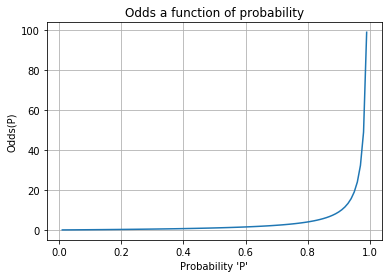

In [4]:
plt.plot(P,oddslist)
plt.title("Odds a function of probability")
plt.ylabel("Odds(P)")
plt.xlabel("Probability 'P'")
plt.grid()

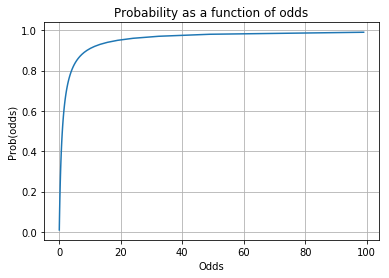

In [5]:
plt.plot(oddslist, problist)
plt.title("Probability as a function of odds")
plt.ylabel("Prob(odds)")
plt.xlabel("Odds")
plt.grid()

In [6]:
def logit(P):
    return np.log(P / (1-P))

In [7]:
P_table = np.arange(0.05,1,0.05)
odds_table = odds(P_table)
logit_table = logit(P_table) # Logit function: logarithmn of the odds
odds_prob = pd.DataFrame({"Odds": odds_table, "Probability": P_table, "Log-odds":logit_table })
odds_prob

,Odds,Probability,Log-odds
0,0.052632,0.05,-2.944439
1,0.111111,0.10,-2.197225
2,0.176471,0.15,-1.734601
3,0.250000,0.20,-1.386294
4,0.333333,0.25,-1.098612
5,0.428571,0.30,-0.847298
6,0.538462,0.35,-0.619039
7,0.666667,0.40,-0.405465
8,0.818182,0.45,-0.200671
9,1.000000,0.50,0.000000


For example, if the value of odds is 4, that would indicate that it is 4 times more likely for an even to occur than not. Given the odds value, we calculate the probability for this case to be 80%, which can be interpreted as expected fraction of occurences if we repeated an experiment N times, so if, N = 1000, and p = 0.8 or 80%, it would be expected the event to occur 0.8*1000 = 800 times.

# Logistic and logit (log-odds) functions 

 The [logit](https://en.wikipedia.org/wiki/Logit) or log-odds (logarithm of odds) function is used in logistic regression, along with the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) which is a particular [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). The logit function is the [inverse](https://en.wikipedia.org/wiki/Inverse_function) of the logistic function and viceversa, therefore it is possible to arrive at the expression of one of the functions by calculating the inverse of the other.
 
 $$ y = logit(p) = log \left ( \frac{p}{1-p} \right ) = logistic(y)^{-1}$$
 
 $$ logistic(y) = p = \frac{1}{1 + e^{-y}} = logit(p)^{-1}$$
 
 The logistic function takes a real value from [-inf,inf] and returns a value in the range (0,1) which can be interpreted as a probability, whereas the logit function takes real values from (0,1) and returns a real value from [-inf, inf].

In [8]:
def logit(P):
    return np.log(P / (1-P))

def logistic(y):
    return 1 / (1 + np.exp(-y))

In [9]:
P_logit = np.arange(0.01,1,0.01)
logit_graph = logit(P_logit)
logistic_graph = logistic(logit_graph)

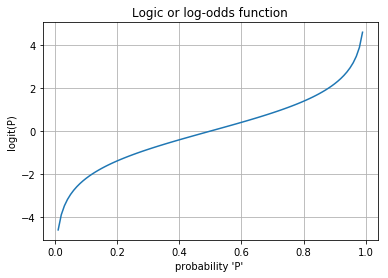

In [10]:
plt.plot(P_logit, logit_graph)
plt.title("Logic or log-odds function")
plt.ylabel("logit(P)")
plt.xlabel("probability 'P' ")
plt.grid()

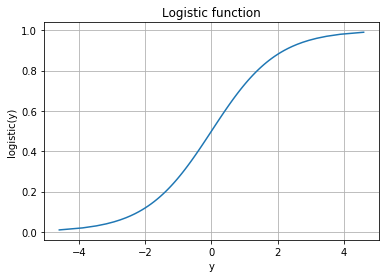

In [11]:
plt.plot(logit_graph, logistic_graph)
plt.title("Logistic function")
plt.ylabel("logistic(y)")
plt.xlabel("y")
plt.grid()

Both the logit and the logistic function are widely used in Machine Learning and statistic, for example in logistic regression. The negative of the logit function is the derivate of the entropy, which is useful to know when fitting models. 

## Entropy
  
In terms of information theory, [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) is considered to be a measure of the uncertainty in a message. To put it intuitively, suppose p = 0. At this probability, the event is certain never to occur, and so there is no uncertainty at all, leading to an entropy of 0. if p = 1, the result is again certain, so the entropy is 0 here as well. When p = 1/2, the uncertainty is at maximun; if one were to place a fair bet on the outcome on this case, there is no advantage to be gained with prior knowledge of the probabilities. In this case, the entropy is maximun at a value of 1 bit.
Intermediate values fall between these cases; for instance, if p = 1/4, there is still a measure of uncertainty on the outcome, but one can still predict the outcome correctly more often than not, so the uncertainty measure, or entrioy, is less than 1 full bit. As mentioned before, the derivate of the entropy might can be expressed as the negative of the logit function:

$$ \frac{d}{dp}H_b(p)=-logit_2(2) = -log_2 \left (\frac{p}{1-p} \right) $$

## Univariate Logistic regression

 The terms introduced before such as probability, odds, logistic and logit function are fundamental to understand the mathematical proccess underlying logistic regression.
 
 Linear regression often works well when the responde variable is quantitative but, consider the situation in which the responde variable takes only two possible values, which can be mathematically interpreted as 0 and 1. There could be arbitrary assignments resulting from observing a qualitative response. For example, the responde could be the outcome of a presidential election, where 1 indicates that the candidate wins and 0 losses, there are many applications that follow this pattern. Suppose that the model has the form:
 
 $$Y_i = \beta_0 + \beta_1x_i + \epsilon_i$$
 
 And the response variable $Y_i$ takes on the values either 0 or 1. It will be assumed that the response variable $Y_i$ is a [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution) [random variable](https://en.wikipedia.org/wiki/Random_variable) with probability of succes $\pi$, which has the following probability distribution:

In [12]:
bernoulli = pd.DataFrame( {"Yi":[1,0], "Probability": ["pi", "1 - pi"]} )
bernoulli

,Yi,Probability
0,1,pi
1,0,1 - pi


Now because $E(\epsilon_i) = 0$, the expected value of the response variable is:

$$ E(Y_i) = 1(\pi_i)+0(1-\pi_i)+E(\epsilon_i)\therefore E(Y_i) = \beta_o + \beta_1x_i = \pi_i$$

This means that the expected response given by the response function $E(Y_i) = \beta_o + \beta_1x_i$ is just the probability that the response variable takes on the value 1.

There are some subsantive problems by using a linear regression model, for example, the value of the response variable could be outside the range (0,1) which makes no sense since need to model the probability of the independtent variable being 1. Generally, when the responde variable is binary, there is considerable empirical evidence indicating that the response function should be nonlinear. A monotonically increasing (or decreasing) S-shaped (or reversed S-shaped) function, such as sigmoids functions are usually employed. For the case of the logistic regression the logistic function is used and the logit function is necessary to interpret the results.

 $$ Logistic(x) = E(Y) = \frac{exp(\beta_o + \beta_1x)}{1+exp(\beta_o + \beta_1x)} = \frac{1}{1+exp[-(\beta_o + \beta_1x)]}$$
 
 In logistic regression, it is assumed that $E(Y)$ is related to $x$ by the logit function:
$$ \frac{E(Y)}{1-E(Y)} = exp(\beta_0 + \beta_1x)$$

$$ log \left(\frac{E(Y)}{1-E(Y)} \right) = \beta_0 + \beta_1x$$

You can see that the left term of the equation is an odds value. Notice that the natural logarithm of the odds is a linear function of the regressor variable(s). Therefore, the slope $\beta_1$ is the difference in the log-odds that results from a one-unit increase in the predictor variable $x$. This means that the odds ratio equals $e^{\beta_1}$ when $x$ increases by one unit. The parameters of this logistic regression model are usually estimated by the method of maximun likelihood, although many other methods can be applied, such as gradient descent if we consider the model a perceptron with the logistic function its activation function.

![](artificial_neuron.png)

 Logistic regression will be ilustrated using data on launch temperature and O-ring failure for the 24 space shuttle launches prior to the Challenger disaster of January 1986. Six O-rings were used to seal field joints on the rocket motor assembly. The following table presents the launch temperatures. A "1" in the O-Ring failure column indicates that at least one O-ring failure had occurred on that launch.

In [13]:
temperatures = np.array([53,56,57,63,66,67,67,67,68,69,70,70,70,70,72,73,75,75,76,76,78,79,80,81])
failures = np.array([1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0])

shuttle = pd.DataFrame({"Temperatures": temperatures, "O-Ring Failure": failures})
shuttle

,Temperatures,O-Ring Failure
0,53,1
1,56,1
2,57,1
3,63,0
4,66,0
5,67,0
6,67,0
7,67,0
8,68,0
9,69,0


 Python scikitlearn module will be used to fir the logistic regression model, although it could be done with other modules such as Tensorflow, keras or even manually implement the algorithm.

Definition and fitting of the logistic regression model.

In [14]:
shuttle_model = LogisticRegression(solver="lbfgs")
shuttle_model.fit(temperatures.reshape(-1,1), failures)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Parameters of the model.

In [15]:
model_output = shuttle_model.predict(temperatures.reshape(-1,1))
model_output

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

It is important to notice as mentioned in the introduction that, logistic regression is not a classifier, since it returns the probability of a sample being part of a class, if we want to make a classifier out of the model, it is necessary to set up a cut-off point, which is what the implementation above is doing, usually 0.5 is taken, to demonstrate that, lets do the calculations ourselves:

In [16]:
def linear_model(X,intercept,coef):
    return intercept + X*coef

def logistic(y):
    return 1 / (1 + np.exp(-y))

def logistic_regression(X,intercept, coef):
    return logistic( linear_model(X,intercept,coef) )

In [17]:
coef = shuttle_model.coef_
intercept = shuttle_model.intercept_
intercept, coef


(array([10.7950794]), array([[-0.17014123]]))

In [18]:
logistic_reg_out = logistic_regression(temperatures, intercept, coef )
logistic_reg_out

array([[0.85539956, 0.78025802, 0.74970309, 0.5190363 , 0.39311392,
        0.3533416 , 0.3533416 , 0.3533416 , 0.31550126, 0.27995893,
        0.24697588, 0.24697588, 0.24697588, 0.24697588, 0.18921959,
        0.16448481, 0.12287168, 0.12287168, 0.10567944, 0.10567944,
        0.07756244, 0.06623117, 0.05645401, 0.0480459 ]])

Those are the probabilities of the value of a sample (temperature) corresponding to a specific class (failure). Notice how probabilities were obtained not classes. Now, if we needed a classifier, we set a cut-off, normally 0.5 is taken so:

In [19]:
cutoff = 0.5
classifications = [prob//cutoff for prob in logistic_reg_out]
classifications, model_output

([array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.])],
 array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]))

Those results are equivalent by those predicted by the model, so now, we know what it is doing.

In [20]:
failures, temperatures

(array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0]),
 array([53, 56, 57, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75,
        75, 76, 76, 78, 79, 80, 81]))

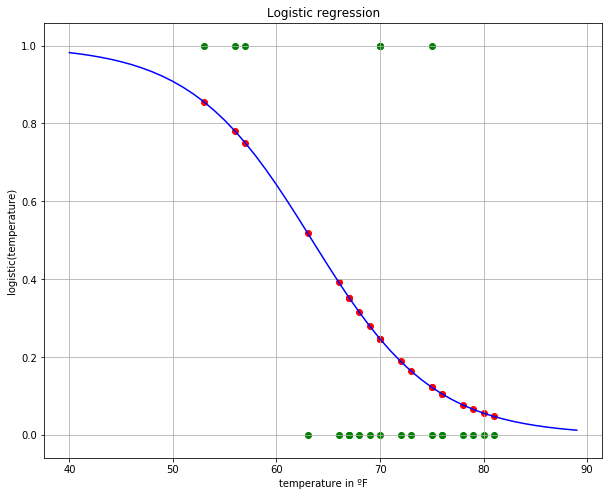

In [21]:
fig = plt.figure(figsize=(10,8))
plt.plot( np.arange(40,90,1), logistic_regression(np.arange(40,90,1),intercept,coef).reshape(-1,1), color="blue" )
plt.scatter(temperatures.reshape(-1,1), logistic_reg_out, color="red")
#plt.scatter(temperatures, model_output, color="yellow")
plt.scatter(temperatures, failures, color="green")
plt.title("Logistic regression")
plt.ylabel("logistic(temperature)")
plt.xlabel("temperature in ºF")
plt.grid()
#plt.savefig('shuttle_failure.eps', format='eps', dpi=1000)


- red dots: probabilities of failure predicted by the model as a function of temperatures.
- green dots: real failure data

We can compare the model performance by a simple accuracy metric:

In [22]:
accuracy = sum( [val == pred for val,pred in zip(failures, model_output)] ) / len(failures) 
accuracy

0.7916666666666666

 We see that the model accuracy is 79.16% but, more important is that we know from the model that a failure is likely to occur for low temperatures with a high probability. This could have saved lives considering that when the shuttle failure in occured in 1986 killing 7 people, the temperature of one of the O-Rings was 31ºF. In summary, logistic regression is useful not only because of it predictive power but also because one might extract useful insights from the model itself.

## Softmax function 

 The [softmax](https://en.wikipedia.org/wiki/Softmax_function) function also known as sotfargmax or normalized exponential function, is a function that takes as input a vector of K elements, and normalises it into a probability distribution of K probabilities. That is, prior to applying softmax, some vector componentes could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger the input components will correspond to larger probabilities. Softmax is often used in artificial neural networks, to map the non-normalized output of a netwotk to a probability distribution over the predicted output classes.
 
The standard (unit) softmax function $\sigma : \mathbb{R}^K \rightarrow \mathbb{R}^K$ is defined by the formula:

$$ \sigma(Z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

for $k = 1,..,K$   and $z = (z_1,...,z_k) \in \mathbb{R}^K$

The softmax function has many applications, for example in neural netwotks, reinforcement learning and in multinomial regression, which is why it is being studied.

In [23]:
def softmax(vec):
    exp = [np.exp(x) for x in vec]
    tot = sum(exp)
    return [x/tot for x in exp]

In [24]:
vec = np.arange(-3,3)
#vec = [np.random.randint(-3,3) for _ in range(10)]
normalized_vec = softmax(vec)
softmax_vec = pd.DataFrame({"Value": vec, "Normalized": normalized_vec})
softmax_vec

,Value,Normalized
0,-3,0.004270
1,-2,0.011606
2,-1,0.031550
3,0,0.085761
4,1,0.233122
5,2,0.633691


Text(0.5, 1.0, 'Vector transformed into a probability distribution')

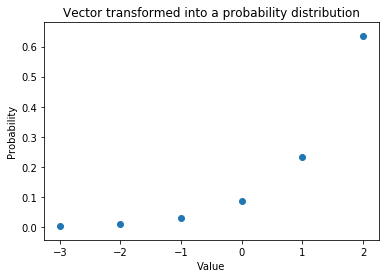

In [25]:
plt.scatter(vec,normalized_vec)
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("Vector transformed into a probability distribution")

In machine learning the softmax function is considered a generalization of the logistic function, since it returns probabilities for each possible class, instead of a probability of a sample being part of a single class as logistic function does.

##  [Multinomial logistic regression ](https://en.wikipedia.org/wiki/Multinomial_logistic_regression)

It is also called by many names such as softmax regression, maximun entropy classifier, polytomous LR, multiclas LR, multinomial logit and the conditional maximun entropy classifier.

 This method generalizes logistic regression to more than two classes, that is, it is a model used to predict the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables.
 
 ### Assumptions
 
 1\. It is assumed that **data is case specific**, that is, each independent variable has a single value for each case.
 
 2\. **The dependent variable can not be perfectly predicted** from the independent variables for any case.
 
 3\. **Colinearity between independent variables is assumed to be relatively low**. Note that is not necessary for them to be independent but, if some independent variables are strongly correlated, it is difficult to differentiate between the impact of several variables.
 
 4\. It relies on the [**indendence of irrelevant alternatives**](https://en.wikipedia.org/wiki/Independence_of_irrelevant_alternatives) (IIA) when modeling choices, which is not always desirable. The assumption states that the odds of preferring one class over another do not depend on the presence of absence of other irrelevant alternatives.

 


The multinomial logistic regression will be ilustrated using the iris dataset, which have four features and 3 classes.

In [26]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The labels need to be codified and the dataset split in to training and test sets.

In [28]:
iris.species = iris.species.replace("setosa",0).replace("versicolor",1).replace("virginica",2)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
123,6.3,2.7,4.9,1.8,2
110,6.5,3.2,5.1,2.0,2
148,6.2,3.4,5.4,2.3,2
106,4.9,2.5,4.5,1.7,2
61,5.9,3.0,4.2,1.5,1
53,5.5,2.3,4.0,1.3,1
99,5.7,2.8,4.1,1.3,1
111,6.4,2.7,5.3,1.9,2
29,4.7,3.2,1.6,0.2,0
18,5.7,3.8,1.7,0.3,0


In [29]:
iris_arr = np.array(iris)
np.random.shuffle(iris_arr)

In [30]:
def one_hot(x, n):
    """
    :param x: label (int)
    :param n: number of bits
    :return: one hot code
    """
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x), n))
    o_h[np.arange(len(x)), x] = 1
    return o_h

In [31]:
Y = iris_arr[:,4].astype(int)
X_train, Y_train = iris_arr[:121,0:4], Y[:121]
X_test, Y_test = iris_arr[121:,0:4], Y[:121]

###  Multinomial logistic regression through sklearn

In [32]:
LR = LogisticRegression(solver = 'lbfgs', multi_class='auto',max_iter = 200)
LR.fit(X_train, iris_arr[:121,4].astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred = LR.predict(X_test)

In [34]:
accuracy_score(iris_arr[121:,4],y_pred)

0.9655172413793104

The predictors are wuite correlated: 

In [35]:
np.corrcoef(iris_arr[:,0:4].T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Which is not good to the model, so we can try with only 1 feature at a time:

In [36]:
Y = iris_arr[:,4].astype(int)
X_train, Y_train = iris_arr[:121,[3]], Y[:121]
X_test, Y_test = iris_arr[121:,[3]], Y[121:]

In [37]:
LR = LogisticRegression(solver = 'lbfgs', multi_class='auto',max_iter = 200)
LR.fit(X_train, iris_arr[:121,4].astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred = LR.predict(X_test)

In [39]:
accuracy_score(Y_test,y_pred)

0.9310344827586207

We can see how we can achive better performance by getting rid of noise and correlated predictors. This accuracy is suspicious though, so I decided to plot the data selected for testing to see how it can be separated, and then all the data.

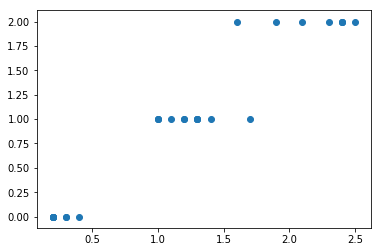

In [40]:
plt.scatter(iris_arr[121:,[3]],iris_arr[121:,4])

Ploting all the data, not only the testing set.

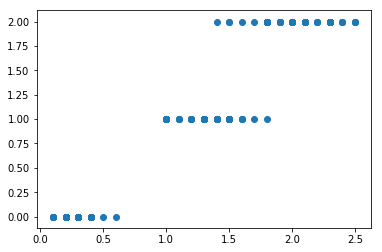

In [41]:
plt.scatter(iris_arr[:,[3]],iris_arr[:,4])

So in we se now that it is not possible to separate all classes by making use of only 1 predictor, the perfect scoring was due to the test set used.

###  Logistic multinomial regression using PCA

In [42]:
Y = iris_arr[:,4]
X = iris_arr[:,0:4]

In [43]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
LR = LogisticRegression(solver = 'lbfgs', multi_class='auto',max_iter = 200, random_state = 42)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

LR will be evaluated using 10fold cross validation for different number of principal components.

In [45]:
scores_pca = [cross_val_score(LR, X@pca.components_[:,:n_comp], Y, cv = 10) for n_comp in range(1,5)]

In [46]:
scores_pca_means = [np.mean(score) for score in scores_pca]

In [47]:
scores_pca_means

[0.9333333333333333,
 0.9866666666666667,
 0.9733333333333333,
 0.9666666666666666]

We can see from the results that it makes no difference if we use 3 or 4 components, even better, we can increase the accuracy by using only the first two components, and even get more than 90% accuracy by using only the first one.

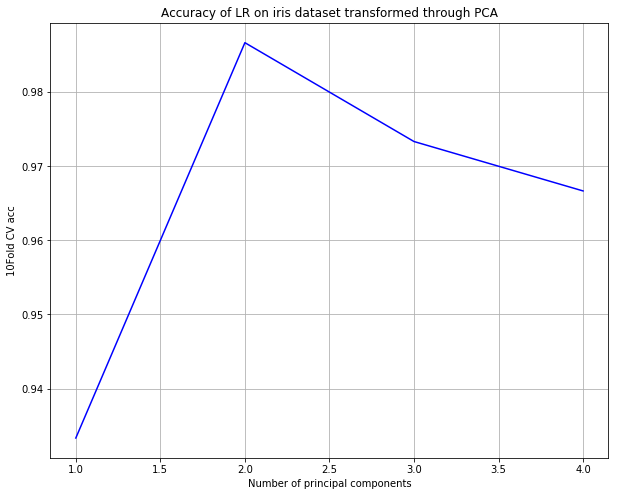

In [48]:
fig = plt.figure(figsize=(10,8))
plt.plot( np.arange(1,5), scores_pca_means, color="blue" )
plt.title("Accuracy of LR on iris dataset transformed through PCA")
plt.ylabel("10Fold CV acc")
plt.xlabel("Number of principal components")
plt.grid()